In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split;
from sklearn.metrics import confusion_matrix;
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer
import sklearn.preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/classification_in_asteroseismology.csv")
df.shape

(1001, 4)

In [ ]:
df.head()

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275


In [ ]:
#cheacking for null values
df.isnull().sum()

POP        0
Dnu        0
numax      0
epsilon    0
dtype: int64

In [ ]:
#descriptive stat
df.describe()

,POP,Dnu,numax,epsilon
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.712288,5.774810,58.441771,0.610774
std,0.452923,2.998103,43.425561,0.342518
min,0.000000,2.500080,17.979780,0.005000
25%,0.000000,4.073160,32.924350,0.220000
50%,1.000000,4.308740,38.293160,0.815000
75%,1.000000,6.580340,70.140830,0.890000
max,1.000000,17.699430,239.648480,1.000000


In [ ]:
#removing outlier
Q1=df.Dnu.quantile(0.25);
Q3=df.Dnu.quantile(0.75);
Q1,Q3


(4.07316, 6.58034)

In [ ]:
#count outliers
IQR=Q3-Q1;
IQR

2.50718

In [ ]:
lower_limit=Q1-1.5*IQR;
upper_limit=Q3+1.5*IQR;
lower_limit,upper_limit

(0.3123899999999997, 10.34111)

In [ ]:
df[(df.Dnu<lower_limit)|(df.Dnu>upper_limit)]

,POP,Dnu,numax,epsilon
4,0,10.44719,120.37356,0.275
37,0,11.28055,129.58759,0.320
58,0,10.36221,123.53948,0.250
61,0,10.62177,136.73959,0.240
63,0,12.58911,152.48999,0.345
...,...,...,...,...
829,0,17.41007,230.53819,0.410
846,0,15.40096,209.34905,0.380
863,0,16.54784,220.99048,0.385
931,0,16.50862,210.76879,0.360


In [ ]:
df_no_outlier=df[(df.Dnu>lower_limit)&(df.Dnu<upper_limit)]
df_no_outlier.describe()

,POP,Dnu,numax,epsilon
count,915.000000,915.000000,915.000000,915.000000
mean,0.777049,5.015678,47.402787,0.637142
std,0.416453,1.615467,22.579322,0.346270
min,0.000000,2.500080,17.979780,0.005000
25%,1.000000,4.055560,32.500220,0.210000
50%,1.000000,4.239000,36.709080,0.830000
75%,1.000000,5.460535,55.153935,0.895000
max,1.000000,10.267190,127.459360,1.000000


In [ ]:
df= df_no_outlier.copy()
  

column_1 = 'Dnu'
column_2='numax'
df[column_1] = MinMaxScaler().fit_transform(np.array(df[column_1]).reshape(-1,1))
df[column_2] = MinMaxScaler().fit_transform(np.array(df[column_2]).reshape(-1,1))
  
 
display(df)

,POP,Dnu,numax,epsilon
0,1,0.250765,0.229112,0.985
1,0,0.572145,0.512394,0.150
2,1,0.018750,0.032875,0.855
3,1,0.224228,0.129267,0.840
5,1,0.233629,0.179151,0.945
...,...,...,...,...
996,0,0.388271,0.292469,0.060
997,1,0.212196,0.128891,0.930
998,1,0.190915,0.118038,0.880
999,1,0.236748,0.252486,0.975


In [ ]:
y=df['POP']
x=df.drop('POP',axis=1);

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
y_train.count()
y

0       1
1       0
2       1
3       1
5       1
       ..
996     0
997     1
998     1
999     1
1000    1
Name: POP, Length: 915, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=3);
dt=dt.fit(x_train,y_train);
y_pred = dt.predict(x_test);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9745454545454545


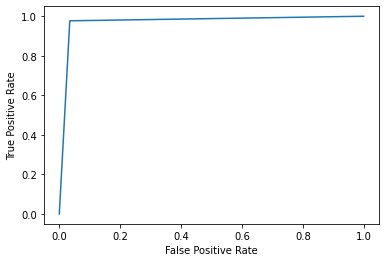

In [ ]:
fpr,tpr,_=metrics.roc_curve(y_pred,y_test);
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3);
dt=dt.fit(x_train,y_train);
y_pred = dt.predict(x_test);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9636363636363636


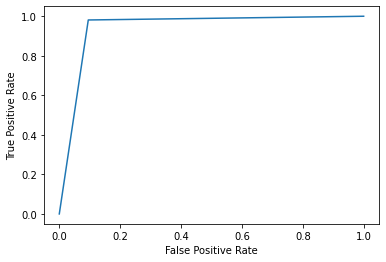

In [ ]:
fpr,tpr,_=metrics.roc_curve(y_pred,y_test);
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train);
y_pred=clf.predict(x_test);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9490909090909091


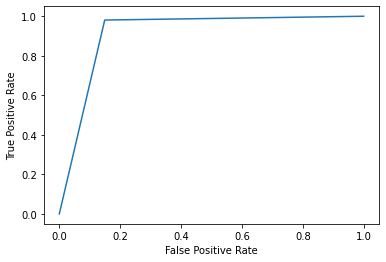

In [ ]:
fpr,tpr,_=metrics.roc_curve(y_pred,y_test);
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=2, random_state=0);
clf.fit(x_train, y_train);
y_pred=clf.predict(x_test);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


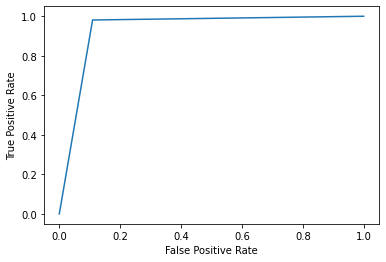

In [ ]:
fpr,tpr,_=metrics.roc_curve(y_pred,y_test);
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
y_pred =clf.fit(x_train, y_train).predict(x_test);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9527272727272728


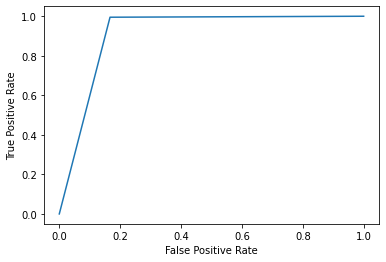

In [ ]:
fpr,tpr,_=metrics.roc_curve(y_pred,y_test);
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cm=confusion_matrix(y_test,y_pred);
cm

array([[ 60,   1],
       [ 12, 202]])